## Import Library & Evaluate data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
file = 'Life Expectancy.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
#data.head()
data.sample(10)

Country  Year      Status  Life expectancy  \
2049                      Poland  2005   Developed             75.0   
2651         Trinidad and Tobago  2013  Developing             71.0   
2604                 Timor-Leste  2012  Developing             67.4   
175                      Bahamas  2000  Developing             72.6   
2174                 Saint Lucia  2009  Developing             74.3   
1035                      Greece  2006  Developing             79.7   
1218  Iran (Islamic Republic of)  2015  Developing             75.5   
2833                  Uzbekistan  2008  Developing             67.9   
2137          Russian Federation  2013  Developing             70.0   
2852                     Vanuatu  2005  Developing             69.9   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2049            144.0              2     9.50               79.415027   
2651            172.0              0     6.71              167.265791   
2604            159.0              2     0.01               30.179985   
175             192.0              0    12.15                0.000000   
2174            147.0              0    11.09                0.000000   
1035             77.0              0     9.42              318.580663   
1218             83.0             18      NaN                0.000000   
2833            184.0             22     2.36               13.890212   
2137            229.0             14    10.58             1529.497771   
2852            165.0              0     0.88              337.294285   

      Hepatitis B  Measles  ...  Polio  Total expenditure  Diphtheria  \
2049         98.0       13  ...   99.0               6.20        99.0   
2651         92.0        0  ...   94.0               5.98        92.0   
2604         83.0       16  ...   83.0               1.10        83.0   
175           NaN        0  ...   91.0               5.21        99.0   
2174         95.0        0  ...   95.0               8.12        95.0   
1035         94.0        0  ...   98.0               9.34        98.0   
1218         98.0      615  ...   98.0                NaN        98.0   
2833         91.0        2  ...   98.0               5.92        98.0   
2137         97.0     2339  ...   98.0               7.90        97.0   
2852         61.0        3  ...   67.0               3.87        68.0   

      HIV/AIDS           GDP  Population  thinness 1-19 years  \
2049       0.1    821.251569  38165445.0                  2.3   
2651       0.3   1967.832830   1348248.0                  5.8   
2604       0.1   1117.777240    115676.0                 11.2   
175        0.1           NaN         NaN                  2.7   
2174       0.1           NaN         NaN                  4.3   
1035       0.1   2481.157810    112362.0                  0.8   
1218       0.1           NaN         NaN                  8.5   
2833       0.3    182.286250     27328.0                  3.1   
2137       0.2  15543.676530  14356911.0                  2.3   
2852       0.1   1886.433359      2937.0                  1.6   

      thinness 5-9 years  Income composition of resources  Schooling  
2049                 2.5                            0.797       14.8  
2651                 6.0                            0.773       12.7  
2604                11.3                            0.618       12.5  
175                  2.6                            0.000       12.0  
2174                 4.4                            0.717       12.7  
1035                 0.7                            0.850       16.3  
1218                 8.6                            0.774       14.8  
2833                 3.1                            0.644       11.9  
2137                 2.3                            0.799       14.6  
2852                 1.5                            0.000       10.6  

[10 rows x 22 columns]

In [5]:
data.shape

(2938, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
drop_col = ['Country', 'Year', 'Status']
data = data.drop(drop_col, axis = 1);

In [9]:
data.head()

Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0             65.0            263.0             62     0.01   
1             59.9            271.0             64     0.01   
2             59.9            268.0             66     0.01   
3             59.5            272.0             69     0.01   
4             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

## Remove row which target variable is null

In [10]:
indexNames = data[data['Life expectancy'].isnull()].index
data = data.drop(indexNames)

In [11]:
data.isnull().sum().get('Life expectancy')

0

In [12]:
y = data['Life expectancy']
X_b4clean = data.drop('Life expectancy' , axis = 1)

## Drop variable (column) that unnecessary

In [13]:
perc_null = []

for column in X_b4clean.columns:
    perc = X_b4clean.isnull().sum().get(column)*100/len(y)
    perc_null.append(perc)

table_pnull = pd.DataFrame()
table_pnull['Column Name'] = X_b4clean.columns
table_pnull['Percentage of Null Value'] = perc_null

# round the percentage to 4 decimal place
table_pnull['Percentage of Null Value'] = table_pnull['Percentage of Null Value'].round(4)

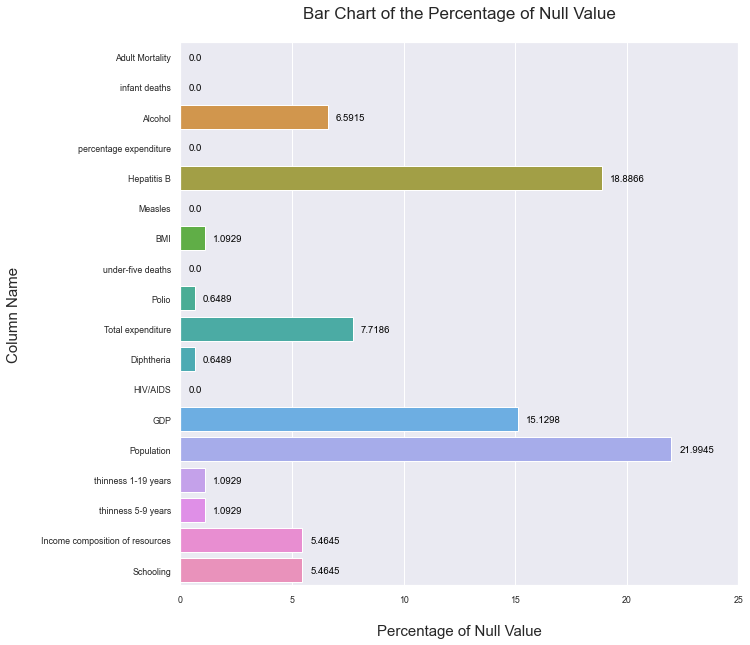

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale = 0.8)
plt.subplots(figsize = (10,10))
plt.title('Bar Chart of the Percentage of Null Value\n', fontsize = 17)
ax = sns.barplot(x = "Percentage of Null Value", y = "Column Name", data = table_pnull)

# for labeling
for i, v in enumerate(table_pnull['Percentage of Null Value']):
    ax.text(v + 0.35, i + 0.1, str(v), color = 'black')

plt.xlabel("Percentage of Null Value", fontsize = 15, labelpad = 20)
plt.ylabel("Column Name", fontsize = 15, labelpad = 20)
plt.xlim([0, 25])
plt.show()

We drop the column with high percentage of null value.

In [15]:
drop_null_high = ['Hepatitis B', 'GDP', 'Population']
X = X_b4clean.drop(drop_null_high, axis = 1)

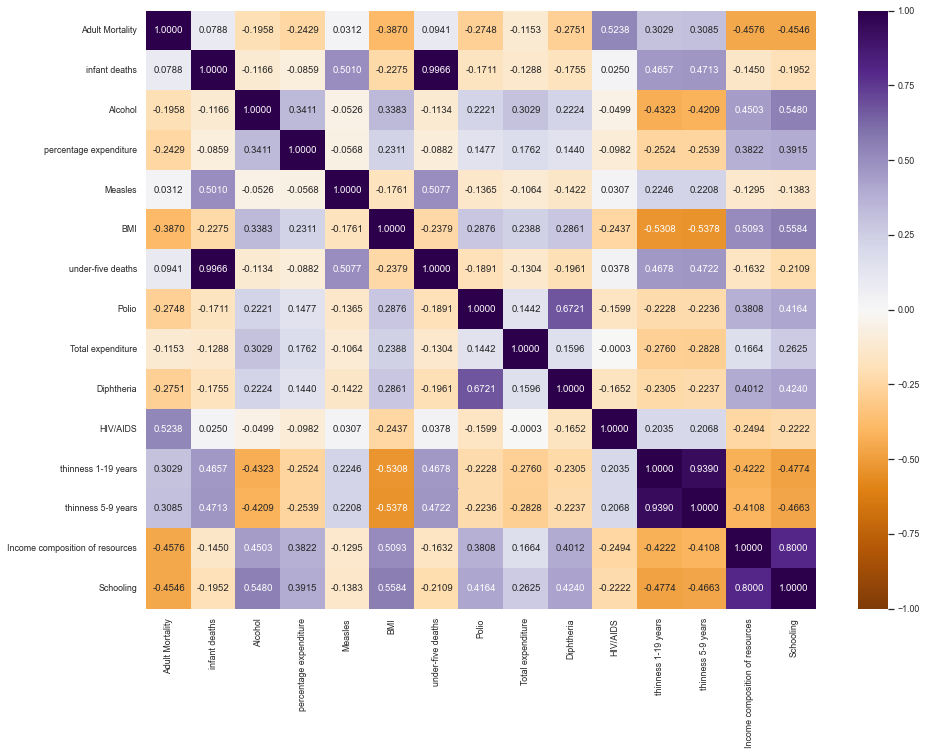

In [16]:
# see the correlation of all the variables
corr_matrix = X.corr('pearson')
plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, cmap = 'PuOr', fmt = '.4f', annot = True, vmin = -1, vmax = 1, center = 0);

Three pair of variables need to be evaluated since they're highly correlated:
1. 'infant deaths' & 'under-five deaths'
2. 'thinness  1-19 years' & 'thinness 5-9 years'
3. 'Income composition of resources' & 'Schooling'

In [17]:
drop_one = data[['infant deaths', 'under-five deaths', 'Life expectancy']]
corr_matrix_1 = drop_one.corr('pearson')
corr_matrix_1.iloc[:,[2]]

Life expectancy
infant deaths            -0.196557
under-five deaths        -0.222529
Life expectancy           1.000000

'under-five deaths' has a higher correlation with our target variable, thus we choose to keep that and drop 'infant deaths'.

In [18]:
drop_one_2 = data[['thinness 1-19 years', 'thinness 5-9 years', 'Life expectancy']]
corr_matrix_2 = drop_one_2.corr('pearson')
corr_matrix_2.iloc[:,[2]]

Life expectancy
thinness 1-19 years        -0.477183
thinness 5-9 years         -0.471584
Life expectancy             1.000000

'thinness 1-19 years' has a higher correlation with our target variable, thus we choose to keep that and drop 'thinness 5-9 years'.

In [19]:
drop_one_3 = data[['Income composition of resources', 'Schooling', 'Life expectancy']]
corr_matrix_3 = drop_one_3.corr('pearson')
corr_matrix_3.iloc[:,[2]]

Life expectancy
Income composition of resources         0.724776
Schooling                               0.751975
Life expectancy                         1.000000

'Schooling' has a higher correlation with our target variable, thus we choose to keep that and drop 'Income composition of resources'.

In [20]:
drop_high_corr = ['infant deaths', 'thinness 5-9 years', 'Income composition of resources']
X = X.drop(drop_high_corr, axis = 1)

Now, the dataset has been reduced to 12 features in total. We may choose a variable from these 12 independent variable.

## Task 1 - Fit the first model ( 1 variable )

In [21]:
col = []

for c in X.columns:
    col.append(c)

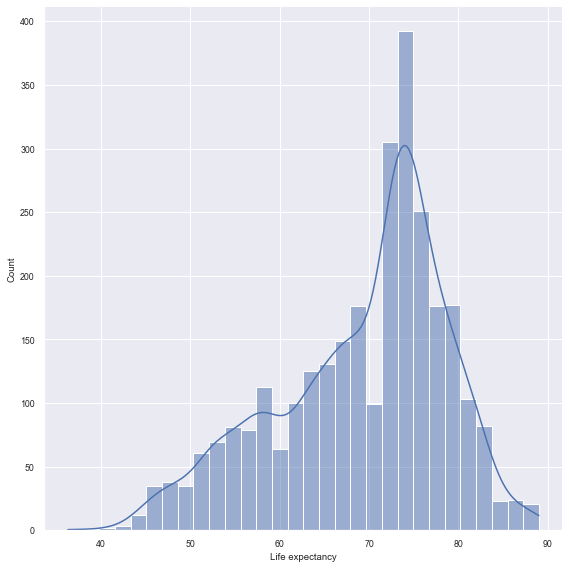

In [22]:
# show distribution of target variable
sns.displot(y, kde = True, height = 8, aspect = 1)

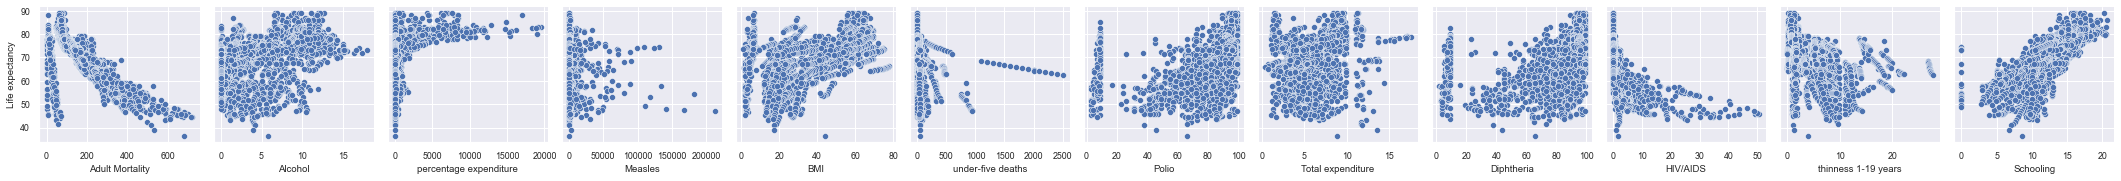

In [23]:
# visualize the correlation of x variable and target variable using scatter plot
highest_corr = data[col]
highest_corr.insert(12, 'Life expectancy', data['Life expectancy'])
sns.pairplot(data = highest_corr,
             x_vars = data[col],
             y_vars = ['Life expectancy'])

In [24]:
# display correlation in table
highest_corr = highest_corr.corr('pearson')
highest_corr.iloc[:,[12]]

Life expectancy
Adult Mortality               -0.696359
Alcohol                        0.404877
percentage expenditure         0.381864
Measles                       -0.157586
BMI                            0.567694
under-five deaths             -0.222529
Polio                          0.465556
Total expenditure              0.218086
Diphtheria                     0.479495
HIV/AIDS                      -0.556556
thinness 1-19 years           -0.477183
Schooling                      0.751975
Life expectancy                1.000000

Text(15.302, 0.5, 'Life expectancy')

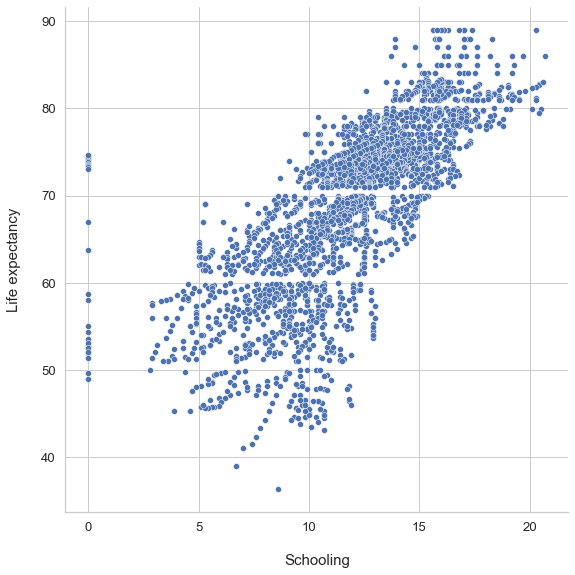

In [25]:
# display scatter plot of schooling and life expectancy in bigger scale
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.relplot(x = 'Schooling', y = 'Life expectancy', data = data, height = 8, aspect = 1)
plt.xlabel("Schooling", fontsize = 15, labelpad = 20)
plt.ylabel("Life expectancy", fontsize = 15, labelpad = 20)

Choose 'Schooling' variable because the correlation with target variable is the highest among all the other variables.

In [26]:
# data of the first model
data_1model = data[['Schooling', 'Life expectancy']]
data_1model = data_1model.dropna(axis = 0)

In [27]:
Q1 = data_1model.quantile(0.25)
Q3 = data_1model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_1model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_1model[ (data_1model[var] < min_) | (data_1model[var] > max_) ].index
    data_1model = data_1model.drop(indexNames)

In [28]:
x_1model = data_1model.iloc[:,0]
y_1model = data_1model.iloc[:,1]

In [29]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

# fit the data into ordinary least squares library
x_1model = sm.add_constant(x_1model)
task_1model = sm.OLS(y_1model, x_1model).fit()
y_pred_1 = task_1model.predict(x_1model)

print(task_1model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     4415.
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:02:29   Log-Likelihood:                -8446.6
No. Observations:                2700   AIC:                         1.690e+04
Df Residuals:                    2698   BIC:                         1.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7359      0.435     96.034      0.0

In [30]:
rmse_1 = rmse(y_1model, y_pred_1)
print("RMSE = {:0.4f}".format(rmse_1))

RMSE = 5.5258


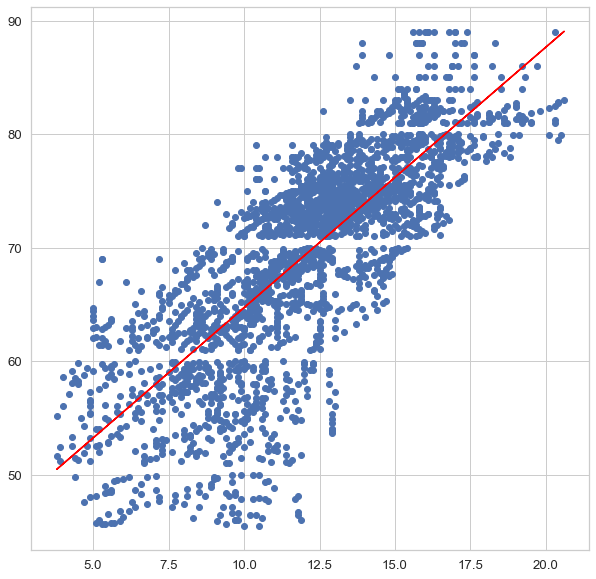

In [34]:
# plot the linear regression line in the scatter plot
plt.subplots(figsize=(10,10))
plt.scatter(x_1model.iloc[:, 1], y_1model)
plt.plot(x_1model.iloc[:, 1], y_pred_1, color = 'red')
plt.show()

## Task 2 - Choose variable for 2nd & 3rd model

In [35]:
from itertools import combinations

In [36]:
# choose eiter 2, 3 or 4 independent variable (x)
var_size = [2, 3, 4]

for size in var_size:
    combi_final = []
    adjRsquare = []
    i = 0
    combi = list(combinations(col, size))
    
    while i < len(combi):
        if size == 2:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1]]])
        elif size == 3:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1], combi[i][2]]])
        else:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1], combi[i][2], combi[i][3]]])
        
        poss_data = pd.concat([poss_data, y], axis = 1)
        poss_data = poss_data.dropna(axis = 0)
    
        Q1 = poss_data.quantile(0.25)
        Q3 = poss_data.quantile(0.75)
    
        # eliminate outlier for both x and y variable
        for var in poss_data.columns:
            Q1_var = Q1.get(var)
            Q3_var = Q3.get(var)
            IQR = Q3_var - Q1_var
            min_ = Q1_var - 1.5 * IQR
            max_ = Q3_var + 1.5 * IQR
    
            indexNames = poss_data[ (poss_data[var] < min_) | (poss_data[var] > max_) ].index
            poss_data = poss_data.drop(indexNames)
    
        poss_x = poss_data.drop('Life expectancy', axis = 1)
        poss_y = poss_data['Life expectancy']
    
        poss_x = sm.add_constant(poss_x)
        poss_model = sm.OLS(poss_y, poss_x).fit()
    
        i = i + 1
        
        # to avoid multicollinearity to high (independent variabel x has high correlation with each other)
        if poss_model.condition_number > 1000:
            continue
        
        adjRsquare.append(poss_model.rsquared_adj)
        combi_final.append(combi[i-1])
        
    combi_final = pd.DataFrame(combi_final)
    adjRsquare = pd.DataFrame(adjRsquare)
    feature_score = pd.concat([combi_final, adjRsquare], axis = 1)
    
    if size == 2:
        feature_score.columns = ['First Feature', 'Second Feature', 'Adj. R-Squared']
        var2_score = feature_score
    elif size == 3:
        feature_score.columns = ['First Feature', 'Second Feature', 'Third Feature', 'Adj. R-Squared']
        var3_score = feature_score
    else:
        feature_score.columns = ['First Feature', 'Second Feature', 'Third Feature', 'Forth Feature', 'Adj. R-Squared']
        var4_score = feature_score

In [37]:
var2_score.nlargest(5, 'Adj. R-Squared')

First Feature Second Feature  Adj. R-Squared
55             HIV/AIDS      Schooling        0.646518
56  thinness 1-19 years      Schooling        0.643987
36                  BMI      Schooling        0.635057
46                Polio      Schooling        0.625129
17              Alcohol      Schooling        0.621255

In [38]:
var3_score.nlargest(5, 'Adj. R-Squared')

First Feature       Second Feature Third Feature  Adj. R-Squared
117         Polio  thinness 1-19 years     Schooling        0.653014
99            BMI  thinness 1-19 years     Schooling        0.652486
63        Alcohol  thinness 1-19 years     Schooling        0.649733
90            BMI                Polio     Schooling        0.643893
125    Diphtheria             HIV/AIDS     Schooling        0.643837

In [39]:
var4_score.nlargest(5, 'Adj. R-Squared')

First Feature Second Feature        Third Feature        Forth Feature  \
17   Adult Mortality        Alcohol             HIV/AIDS  thinness 1-19 years   
123              BMI          Polio  thinness 1-19 years            Schooling   
74           Alcohol            BMI  thinness 1-19 years            Schooling   
90           Alcohol          Polio  thinness 1-19 years            Schooling   
10   Adult Mortality        Alcohol                  BMI             HIV/AIDS   

     Adj. R-Squared  
17         0.661031  
123        0.659938  
74         0.656942  
90         0.653788  
10         0.653179

By comparing the adjusted R-squared of the above three tables, the features that give the highest adj. r-squared score is
1. Adult Mortality & Alcohol & HIV/AIDS & thinness 1-19 years
2. BMI & Polio & thinness 1-19 years & Schooling

## Task 2 - Fit the second model ( 4 variable )

In [40]:
# data of the second model
data_2model = data[['Adult Mortality', 'Alcohol', 'HIV/AIDS', 'thinness 1-19 years', 'Life expectancy']]
data_2model = data_2model.dropna(axis = 0)

In [41]:
Q1 = data_2model.quantile(0.25)
Q3 = data_2model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_2model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_2model[ (data_2model[var] < min_) | (data_2model[var] > max_) ].index
    data_2model = data_2model.drop(indexNames)

In [42]:
x_2model = data_2model.drop('Life expectancy', axis = 1)
y_2model = data_2model['Life expectancy']

In [43]:
x_2model = sm.add_constant(x_2model)
task_2model = sm.OLS(y_2model, x_2model).fit()
y_pred_2 = task_2model.predict(x_2model)

print(task_2model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:02:53   Log-Likelihood:                -5892.7
No. Observations:                2129   AIC:                         1.180e+04
Df Residuals:                    2124   BIC:                         1.182e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  77.8002    

In [44]:
rmse_2 = rmse(y_2model, y_pred_2)
print("RMSE = {:0.4f}".format(rmse_2))

RMSE = 3.8532


## Task 2 - Fit the third model ( 4 variable )

In [45]:
data_3model = data[['BMI', 'Polio', 'thinness 1-19 years', 'Schooling', 'Life expectancy']]
data_3model = data_3model.dropna(axis = 0)

In [46]:
Q1 = data_3model.quantile(0.25)
Q3 = data_3model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_3model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_3model[ (data_3model[var] < min_) | (data_3model[var] > max_) ].index
    data_3model = data_3model.drop(indexNames)

In [47]:
x_3model = data_3model.drop('Life expectancy', axis = 1)
y_3model = data_3model['Life expectancy']

In [48]:
x_3model = sm.add_constant(x_3model)
task_3model = sm.OLS(y_3model, x_3model).fit()
y_pred_3 = task_3model.predict(x_3model)

print(task_3model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1140.
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:02:53   Log-Likelihood:                -7064.3
No. Observations:                2349   AIC:                         1.414e+04
Df Residuals:                    2344   BIC:                         1.417e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  36.7246    

In [49]:
rmse_3 = rmse(y_3model, y_pred_3)
print("RMSE = {:0.4f}".format(rmse_3))

RMSE = 4.8961


## Task 3 - Compare 3 model

In [50]:
adjR2 = [task_1model.rsquared_adj, task_2model.rsquared_adj, task_3model.rsquared_adj]
rmse = [rmse_1, rmse_2, rmse_3]
col_name = ['1', '2', '3']

In [57]:
# to set label
def set_label(ax):
    rects = ax.patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = 10
        ha = 'left'
        label = '{:,.3f}'.format(x_value)
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext = (space, -4),          
            textcoords = 'offset points',
            va = 'center',                
            ha = ha)

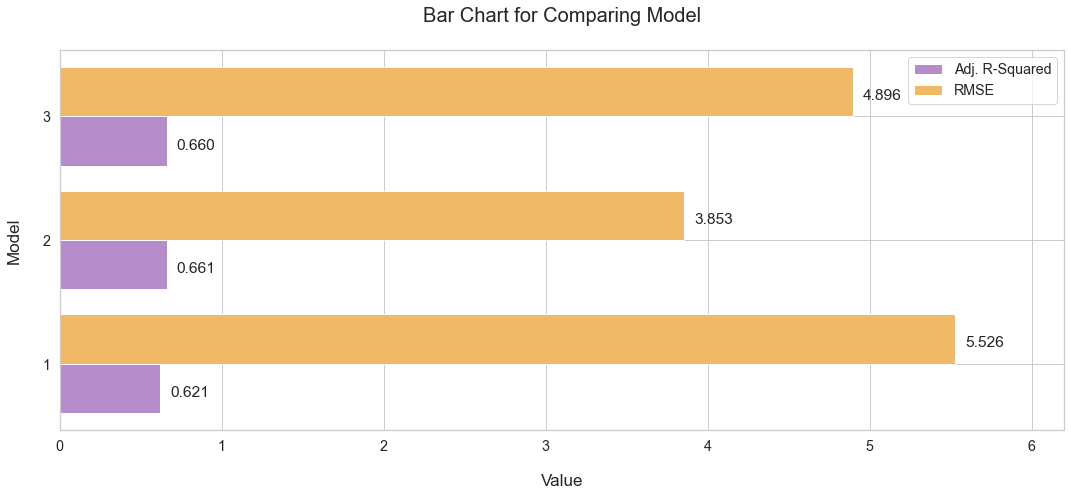

In [58]:
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
plt.subplots(figsize = (18, 7))
plt.title('Bar Chart for Comparing Model\n', fontsize = 20)

Y_axis = np.arange(len(col_name))

ax = plt.barh(Y_axis - 0.2, adjR2, 0.4, color = '#b58bc9', label = 'Adj. R-Squared')
set_label(ax)
ax = plt.barh(Y_axis + 0.2, rmse, 0.4, color = '#f0b967', label = 'RMSE')
set_label(ax)
    
plt.yticks(Y_axis, col_name)
plt.xlabel("Value", fontsize = 17, labelpad = 20)
plt.ylabel("Model", fontsize = 17, labelpad = 20)
plt.xlim([0, 6.2])
plt.legend()
plt.show()

## Task 4 - Prediction Interval

In [53]:
# choose x variable using measures of central tendency (mean)

x1 = data_2model['Adult Mortality'].mean()
x2 = data_2model['Alcohol'].mean()
x3 = data_2model['HIV/AIDS'].mean()
x4 = data_2model['thinness 1-19 years'].mean()

x_variable = [1, x1, x2, x3, x4]
# 1 is for the B0 (const)

In [54]:
prediction = task_2model.get_prediction(pd.DataFrame([x_variable]))
ci = prediction.summary_frame(alpha = 0.05)

print("The choosen set of X values:")
print("x1 - Adult Mortality     = {:0.4f}".format(x1))
print("x2 - Alcohol             = {:0.4f}".format(x2))
print("x3 - HIV/AIDS            = {:0.4f}".format(x3))
print("x4 - thinness 1-19 years = {:0.4f}\n".format(x4))

print("The upper confidence limit of life expectancy is = {:0.4f} years old".format(ci.obs_ci_upper[0]))
print("The lower confidence limit of life expectancy is = {:0.4f} years old".format(ci.obs_ci_lower[0]))

The choosen set of X values:
x1 - Adult Mortality     = 129.4814
x2 - Alcohol             = 5.0305
x3 - HIV/AIDS            = 0.2409
x4 - thinness 1-19 years = 3.6882

The upper confidence limit of life expectancy is = 80.3664 years old
The lower confidence limit of life expectancy is = 65.2323 years old
